2024 7월 기준 인구 데이터를 가지고, 여러가지 데이터 분석과 시각화를 해봅시다.

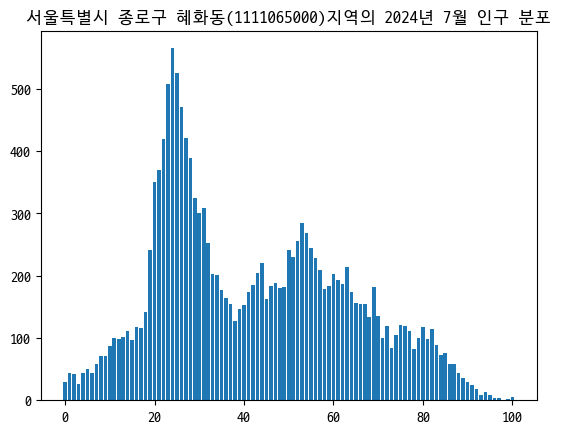

In [19]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

popList = []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]
        for i in row[3:104] : # 남녀 연령별 인구 (0세 ~ 100세 이상)
            popList.append(int(i.replace(',', '')))

file.close()
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 인구 분포")
plt.bar(range(101), popList)
plt.show()

위 코드를 응용하여 서울시 강서구 지역의 남자(blue), 여자(red) 분포도를 각각 그리세요.

남자 0 ~ 100 : 106:207
여자 0 ~ 100 : 209:310

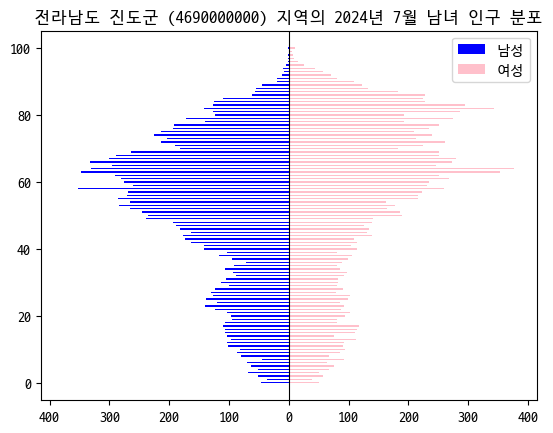

In [44]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터 파일 열기
with open('202407_population.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file, delimiter=',')

    maleList = []
    femaleList = []
    addrName = ''

    # 사용자로부터 지역 코드 입력 받기
    code = input('조회하시길 원하는 지역의 코드를 입력하세요: ')

    # 데이터에서 해당 지역 코드 찾기
    for row in data:
        if code in row[0]:
            addrName = row[0]

            # 남성과 여성 인구 데이터를 리스트에 저장
            for i in range(101):
                maleList.append(int(row[i+106].replace(',', '')))
                femaleList.append(int(row[i+209].replace(',', '')))
            break  # 찾은 지역 데이터가 있으면 루프 종료

# 시각화 설정
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + " 지역의 2024년 7월 남녀 인구 분포")

# 막대 차트를 각각 남성과 여성 데이터로 생성
indices = range(101)
plt.barh(indices, [-m for m in maleList], color='blue', label='남성', align='center', height=0.4)  # 남성 데이터를 음수로 변환
plt.barh(indices, femaleList, color='red', label='여성', align='center', height=0.4)  # 여성 데이터는 그대로

# x축의 범위 조정
max_value = max(max(maleList), max(femaleList))
plt.xlim(-max_value * 1.1, max_value * 1.1)  # x축의 범위를 양쪽 방향으로 확장

# x축 포맷터 설정 (음수 기호 숨기기)
def format_func(value, tick_number):
    if value < 0:
        return f'{-value:,.0f}'
    return f'{value:,.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# x=0에 수직선 추가
plt.axvline(0, color='black', linewidth=0.8)  # x=0에 수직선 추가

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.legend()
plt.show()
